# Week 1
## Exercise

### Q1
Generate the observed signal: For x=[0,1,...,10pi]
y*(x, A’, f*) = A* sin(f* x) + e, e ~ N(mean=0,sd=0.1) We set the true parameter values as A*=0.5 and f*=10.

In [30]:
import numpy as np

# define A* and f*

A_star = 0.5
f_star = 10

# define x range
x = np.arange(0, 10*np.pi, 0.1)

# generate the observed signal y*
np.random.seed(42)
e = np.random.normal(loc=0, scale=0.1, size=len(x))
y_star = A_star * np.sin(f_star * x) + e


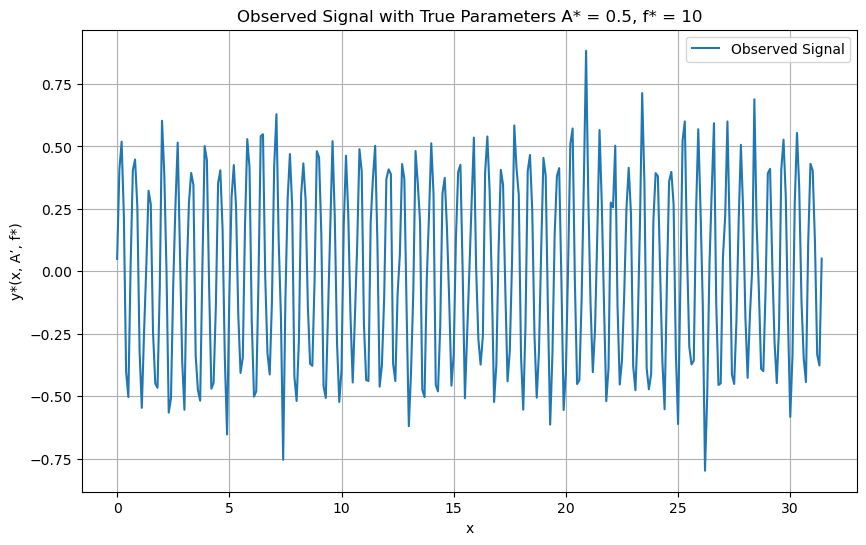

In [31]:
# plot the ovserved signal
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, y_star, label="Observed Signal")
plt.title("Observed Signal with True Parameters A* = 0.5, f* = 10")
plt.xlabel("x")
plt.ylabel("y*(x, A’, f*)")
plt.legend()
plt.grid(True)
plt.show()


### Q2
The statistical model for y at x is
p(y(x)|A,f, y*(x)) = Normal(mean=y(x)-y*(x), sd=1) where y(x)=A sin(f x) + e, e~N(mean=0,sd=0.1).
Based on the above, write down the Likelihood + code it

Normal distribution PDF:

$Likelihood = \prod_{i=1}^n p(y^*(x_i)|A,f)   $

$ = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(y^*(x_i) - Asin(fx_i))^2}{2\sigma^2})$

In [18]:
# calaulate Likelihood
from scipy.stats import norm

def log_likelihood(A, f, x, y_star):
    y_pred = A * np.sin(f * x)  # model
    log_l = np.sum(norm.logpdf(y_star, loc=y_pred, scale=1))  # log_likelihood
    return log_l


log_l_value = log_likelihood(A_star, f_star, x, y_star)
print(f"Log likelihood for A={A_star}, f={f_star}: {log_l_value}")


Log likelihood for A=0.5, f=10: -290.95996225614954


### Q3
We want you to code this up in python, and generate posterior distributions for A and f – using your own MCMC implementation

In [34]:
def log_prior(A, f):
    # define the priors for A and f
    if 0 <= A <= 1 and 0 <= f <= 20:
        return 0  
    else:
        return -np.inf  

# Metropolis-Hastings
def metropolis_hasting_iterator(curr_state, x, y_star, verbose=False):
    proposal = curr_state + np.random.normal(0, [0.05, 2], 2)  # Set different proposal variances for A and f respectively
    log_l_curr = log_likelihood(curr_state[0], curr_state[1], x, y_star)
    log_p_curr = log_prior(curr_state[0], curr_state[1])
    log_l_prop = log_likelihood(proposal[0], proposal[1], x, y_star)
    log_p_prop = log_prior(proposal[0], proposal[1])
    
    log_accept_prob = (log_l_prop + log_p_prop) - (log_l_curr + log_p_curr)
    
    if np.log(np.random.uniform(0, 1)) < log_accept_prob:
        return proposal
    return curr_state

def mcmc(initial_state, n_samples, x, y_obs, verbose=False):
    chain = np.zeros((n_samples, 2))
    curr_state = initial_state
    for i in range(n_samples):
        curr_state = metropolis_hasting_iterator(curr_state, x, y_obs, verbose=verbose)
        chain[i, :] = curr_state
    return chain

# Initialization parameters
initial_state = np.array([0.5, 10])  
n_samples = 10000  

# do MCMC
chain = mcmc(initial_state, n_samples, x, y_star, verbose=False)




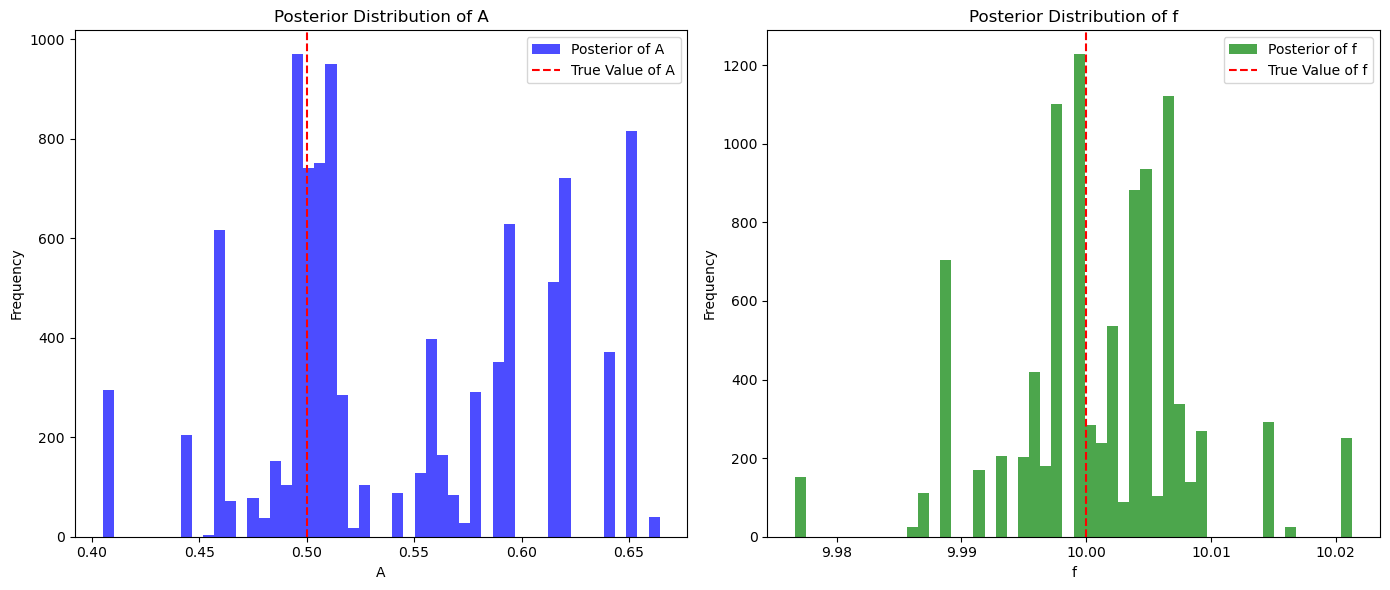

In [35]:
# Plot the posterior distribution of parameters A and f
plt.figure(figsize=(14, 6))

# paramater A
plt.subplot(1, 2, 1)
plt.hist(chain[:, 0], bins=50, color='blue', alpha=0.7, label='Posterior of A')
plt.axvline(x=A_star, color='r', linestyle='--', label='True Value of A')
plt.title('Posterior Distribution of A')
plt.xlabel('A')
plt.ylabel('Frequency')
plt.legend()

# paramater f
plt.subplot(1, 2, 2)
plt.hist(chain[:, 1], bins=50, color='green', alpha=0.7, label='Posterior of f')
plt.axvline(x=f_star, color='r', linestyle='--', label='True Value of f')
plt.title('Posterior Distribution of f')
plt.xlabel('f')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
